Implementieren Sie eine Funktion MERGE die eine Liste von Intervallen entgegennimmt und als Ergebnis wiederum eine Liste von Intervallen zurückgibt. Im Ergebnis sollen alle sich überlappenden Intervalle gemerged sein. Alle nicht überlappenden Intervalle bleiben unberührt.

Beispiel:
Input: [25,30] [2,19] [14, 23] [4,8]  Output: [2,23] [25,30]

Wie ist die Laufzeit Ihres Programms ? 
Wie kann die Robustheit sichergestellt werden, vor allem auch mit Hinblick auf sehr große
Eingaben ?
Wie verhält sich der Speicherverbrauch ihres Programms ?









Wir treffen die Annahme dass für jedes Interval `[start, end]` der Eingabe `start < end` gilt.

Eine Bruteforce Lösung würde alle Intervalle mit allen anderen vergleichen und hätte eine Laufzeit von `O(n²)`. Wir verbessern die Laufzeit indem wir die Intervalle zuerst nach der ersten Komponente sortieren und anschliessend je zwei aufeinanderfolgende Elemente auf Überlappung testen. Da die in dieser Iteration konstruierte Ergebnis Liste höchstens so groß werden kann wie die Eingabe Liste liegt der Speicherverbrauch in `O(n)`. Die Sortierung geschieht in-place und erhöht den Speicherverbrauch nicht. Die Laufzeit liegt mit Sortieren + Iteration über sortierten Input in `O(n*logn) + O(n) = O(n*logn)`. Python verwendet Timsort, damit könnte die Sortierung im Bestfall auch in `O(n)` liegen und damit ebenfalls die Gesamtlaufzeit. 

In [1]:
intervals = [[25,30], [2,19], [14, 23], [4,8]] 
expected_result = [[2,23], [25,30]]

def merge(intervals):
    intervals.sort(key=lambda interval: interval[0]) #sort by first component
    merged = [intervals.pop(0)]    
    for current in intervals:
        last = merged.pop() #we only need to consider last element due to sorting
        if current[0] <= last[1]:
            merged_interval = [last[0], max(last[1], current[1])]
            merged.append(merged_interval)
        else:
            merged.append(last)
            merged.append(current)
    return merged

merged = merge(intervals)
print(merged)
print(expected_result == merged)        

[[2, 23], [25, 30]]
True


Robustheit interpretieren wir hier zum einen bzgl der Funktionalität, d.h. eine robuste Lösung ist korrekt. Zum anderen betrachten wir auch nicht-funktionale Aspekte insbesondere die Laufzeit und Speicherverbauch. Beides lässt sich einfach in Python messen mittels Profiler. Wir messen hier der Übersicht zu Liebe direkt im Code.

Der naheliegende Test bzgl. Korrektheit ist die Verwendung von Zufalls Werten. Dazu konstruieren wir `n`zufällige Intervalle und verfizieren, dass je zwei Intervalle `a` und `b` des Ergebnisses sich nicht überlappen. Da wir in unserer Lösung die Intervalle sortieren, können wir die Verifikation vereinfachen und für je zwei auf einerander folgende `a`und `b` prüfen ob `a[0] < a[1] < b[0] < b[1]`. Da wir oben angenommen haben , dass für jedes Interval `[start, end]` der Eingabe `start < end` gilt, vereinfacht sich die Verifikation auf `a[1] < b[0]` Damit reicht uns eine Iteration für die Verifikation statt alle Intervalle mit allen zu vergleichen, also`O(n)` statt `O(n²)` Laufzeit.

In [2]:
from random import randrange
max_value = 1000
sample_size = 5
test_input = [sorted([randrange(max_value), randrange(max_value)]) for i in range(sample_size)]
print(test_input)
merged = merge(test_input)
print(merged)
def verify(merged):
    no_overlap = True
    for i in range(len(merged)-1):
        a = merged[i]
        b = merged[i+1]
        if a[1] > b[0]:
            no_overlap = False
            break;
    return no_overlap
print("the result has no overlaps: {}".format(verify(merged)))

[[420, 718], [106, 848], [295, 725], [805, 900], [470, 632]]
[[106, 900]]
the result has no overlaps: True


In [3]:
import time
max_value = 1000
sample_size = 5
def test(runs=1000):
    run_times = []
    for i in range(1, runs):
        test_input = [sorted([randrange(max_value*i), randrange(max_value*i)]) for i in range(1, sample_size*i)]
        start = time.time()
        merged = merge(test_input)
        diff = time.time() - start
        run_times.append(diff)
        if not verify(merged):
            print('Invalid result in run {}'.format(i))
    return run_times
run_times = test()        

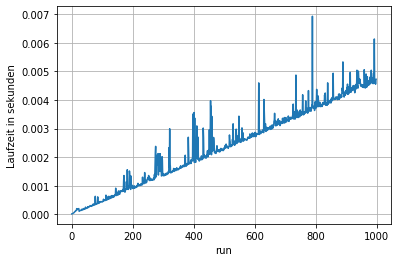

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = range(len(run_times))
s = run_times

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='run', ylabel='Laufzeit in sekunden')
ax.grid()
